<a href="https://colab.research.google.com/github/wardhan2808/Otsu-Method/blob/main/OtsuMethod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import cv2
import os
import glob 
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt

In [ ]:
Dir = "/content/drive/MyDrive/Computer Vision/OtsuMethod"
images = os.listdir(Dir)
Images = [os.path.join(Dir,fname) for fname in images]

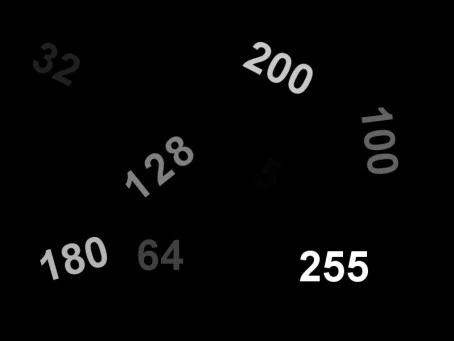

In [ ]:
image = cv2.imread(Images[0])
cv2_imshow(image)
image_result = np.asarray( image, dtype="int32" )
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = cv2.GaussianBlur(image, (5, 5), 0)

In [ ]:
bins_num = 256
 
hist, bin_edges = np.histogram(image, bins=bins_num)
 
hist = np.divide(hist.ravel(), hist.max())
 
bin_mids = (bin_edges[:-1] + bin_edges[1:]) / 2.

weight1 = np.cumsum(hist)

weight2 = np.cumsum(hist[::-1])[::-1]

mean1 = np.cumsum(hist * bin_mids) / weight1

mean2 = (np.cumsum((hist * bin_mids)[::-1]) / weight2[::-1])[::-1]
 
inter_class_variance = weight1[:-1] * weight2[1:] * (mean1[:-1] - mean2[1:]) ** 2
index_of_max_val = np.argmax(inter_class_variance)

threshold = bin_mids[:-1][index_of_max_val]
print("Otsu's algorithm implementation thresholding result: ", threshold)

Otsu's algorithm implementation thresholding result:  74.208984375


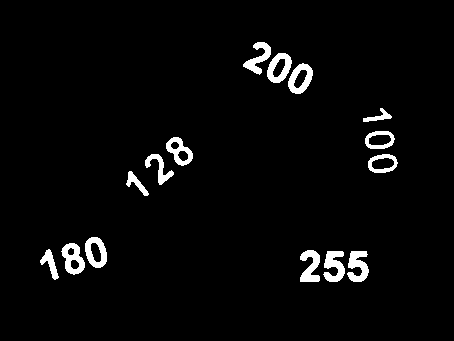

Obtained threshold:  74.0


In [ ]:
otsu_threshold, image_result = cv2.threshold( image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU,)
cv2_imshow(image_result)
print("Obtained threshold: ", otsu_threshold)